<a href="https://colab.research.google.com/github/thiagoribeiro00/neuroscience-computational/blob/main/snn_Izhikevich.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 📦 Importação das bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# 🧠 Definição da classe IzhikevichNeuron (sem alterações)
class IzhikevichNeuron:
    def __init__(self, a=0.02, b=0.2, c=-65, d=8, v_init=-65, u_init=None):
        self.a = a
        self.b = b
        self.c = c
        self.d = d
        self.v = v_init
        self.u = u_init if u_init is not None else b * v_init
        self.v_trace = []
        self.spikes = []

    def step(self, I):
        if self.v >= 30:
            self.v_trace.append(30)
            self.spikes.append(1)
            self.v = self.c
            self.u += self.d
        else:
            self.v_trace.append(self.v)
            self.spikes.append(0)

        dv = 0.04 * self.v**2 + 5 * self.v + 140 - self.u + I
        du = self.a * (self.b * self.v - self.u)
        self.v += dv
        self.u += du

    def run(self, I, time_steps):
        self.v_trace = []
        self.spikes = []
        for t in range(time_steps):
            self.step(I[t])
        return np.array(self.v_trace), np.array(self.spikes)

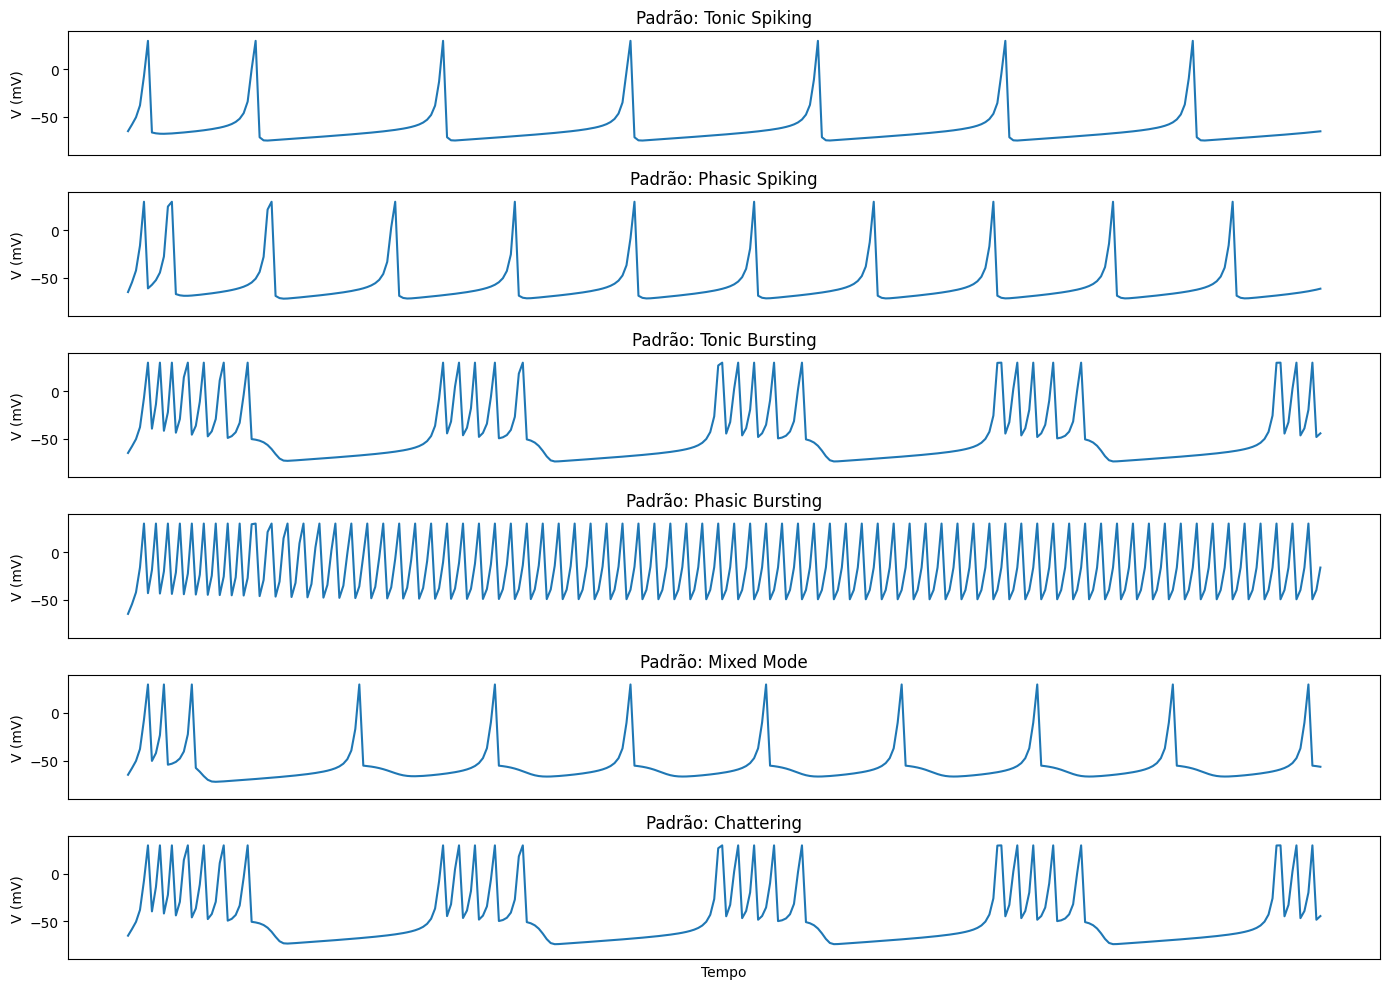

In [ ]:
# ⚡ Simulação para diferentes padrões de disparo (bursting, chattering, tonic spiking)

time_steps = 300
I_input = np.full(time_steps, 10.0)  # Corrente constante para simplicidade

# Parâmetros típicos para diferentes padrões (de Izhikevich, 2003)
param_patterns = {
    "Tonic Spiking": {'a': 0.02, 'b': 0.2, 'c': -65, 'd': 8},
    "Phasic Spiking": {'a': 0.02, 'b': 0.25, 'c': -65, 'd': 6},
    "Tonic Bursting": {'a': 0.02, 'b': 0.2, 'c': -50, 'd': 2},
    "Phasic Bursting": {'a': 0.02, 'b': 0.25, 'c': -55, 'd': 0.05},
    "Mixed Mode": {'a': 0.02, 'b': 0.2, 'c': -55, 'd': 4},
    "Chattering": {'a': 0.02, 'b': 0.2, 'c': -50, 'd': 2}
}

plt.figure(figsize=(14, 10))

for i, (pattern, params) in enumerate(param_patterns.items(), 1):
    neuron = IzhikevichNeuron(**params)
    v_trace, spikes = neuron.run(I_input, time_steps)

    plt.subplot(len(param_patterns), 1, i)
    plt.plot(v_trace)
    plt.title(f"Padrão: {pattern}")
    plt.ylabel("V (mV)")
    plt.ylim([-90, 40])
    plt.xticks([])

plt.xlabel("Tempo")
plt.tight_layout()
plt.show()


## 🧠 Neurônio de Izhikevich — Ajustando Parâmetros para Diferentes Padrões de Disparo

### 📌 Objetivo
Simular diferentes padrões de disparo de neurônios biológicos usando o modelo de Izhikevich, alterando os parâmetros do modelo para reproduzir comportamentos como:

- **Tonic Spiking:** disparos regulares e contínuos.
- **Phasic Spiking:** disparos isolados e rápidos.
- **Tonic Bursting:** explosões repetidas de spikes.
- **Phasic Bursting:** rajadas curtas de disparos.
- **Mixed Mode:** combinação de bursts e spikes isolados.
- **Chattering:** disparos rápidos e pulsantes.

---

### 🏗️ Como funciona o modelo

O modelo de Izhikevich é definido por um conjunto de equações diferenciais não lineares que simulam a dinâmica do potencial de membrana e de uma variável de recuperação. Os parâmetros do modelo (`a`, `b`, `c`, `d`) controlam o comportamento do neurônio, alterando:

- Tempo de recuperação
- Sensibilidade a estímulos
- Valor de reset após disparo
- Incremento pós-disparo na variável de recuperação

---

### 🖥️ Estrutura do código

- Definimos uma corrente constante de entrada (`I = 10`) para simplicidade.
- Para cada padrão de disparo, criamos um neurônio com parâmetros específicos (baseados no artigo original de Izhikevich, 2003).
- Rodamos a simulação por 300 passos de tempo.
- Plotamos o potencial de membrana ao longo do tempo para cada padrão.

---

### 🔍 O que observar nos gráficos

- **Picos atingindo 30 mV** indicam os spikes.
- O formato e a frequência dos spikes variam conforme os parâmetros.
- Por exemplo, o **Tonic Spiking** apresenta disparos regulares e espaçados.
- Já o **Bursting** exibe grupos de disparos seguidos.
- O **Chattering** mostra disparos rápidos e pulsantes.

---

### 🧪 Aplicações práticas

- Modelar diferentes tipos de neurônios presentes no cérebro.
- Entender como alterações em parâmetros biológicos afetam a dinâmica neural.
- Criar simulações realistas para redes neurais biológicas ou neuromórficas.

